In [2]:
# 0. Imports de base
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Chargement des données
df = pd.read_csv("/content/heart_disease_uci.csv")

print("Shape initiale :", df.shape)
print(df.head())
print(df.dtypes)

# 2. Nettoyage des données
# a) Suppression des doublons
df = df.drop_duplicates()

# b) Suppression éventuelle d'un identifiant s'il existe
for col in ["id", "ID", "patient_id"]:
    if col in df.columns:
        df = df.drop(columns=[col])

print("Shape après suppression doublons/id :", df.shape)

# 3. Séparation features / target
# Adapte le nom de la cible selon ta version : "target", "num", "output", etc.
# Regarde df.columns pour vérifier
print("Colonnes :", df.columns)

target_candidates = ["target", "num", "output", "HeartDisease"]
target_col = None
for c in target_candidates:
    if c in df.columns:
        target_col = c
        break

if target_col is None:
    raise ValueError("Impossible de trouver la colonne cible, vérifie le nom dans df.columns")

print("Colonne cible utilisée :", target_col)

X = df.drop(columns=[target_col])
y = df[target_col]

# 4. Identification colonnes numériques / catégorielles
# Hypothèse typique pour UCI Heart Disease
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# On ne garde que celles qui existent vraiment dans X
num_cols = [c for c in num_cols if c in X.columns]
cat_cols = [c for c in cat_cols if c in X.columns]

print("Numériques :", num_cols)
print("Catégorielles :", cat_cols)

# 5. Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # pour garder la proportion de classes
)

print("Shape X_train :", X_train.shape)
print("Shape X_test  :", X_test.shape)

# 6. Pré-traitement : Imputation + Encodage + Standardisation

# a) Numérique : imputation (médiane) + standardisation
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# b) Catégoriel : imputation (mode) + One-Hot Encoding
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# c) Combinaison avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols),
    ]
)

# 7. Application du pré-traitement
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print("Shape X_train_prepared :", X_train_prepared.shape)
print("Shape X_test_prepared  :", X_test_prepared.shape)


Shape initiale : (920, 16)
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4        

 Initialisation et définition des colonnes


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

print(df.columns)

target_col = "target"

num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

num_cols = [c for c in num_cols if c in df.columns]
cat_cols = [c for c in cat_cols if c in df.columns]

print("Numériques :", num_cols)
print("Catégorielles :", cat_cols)


Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Numériques : ['age', 'trestbps', 'chol', 'oldpeak']
Catégorielles : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


**Histogrammes et boxplots des variables** **numériques**

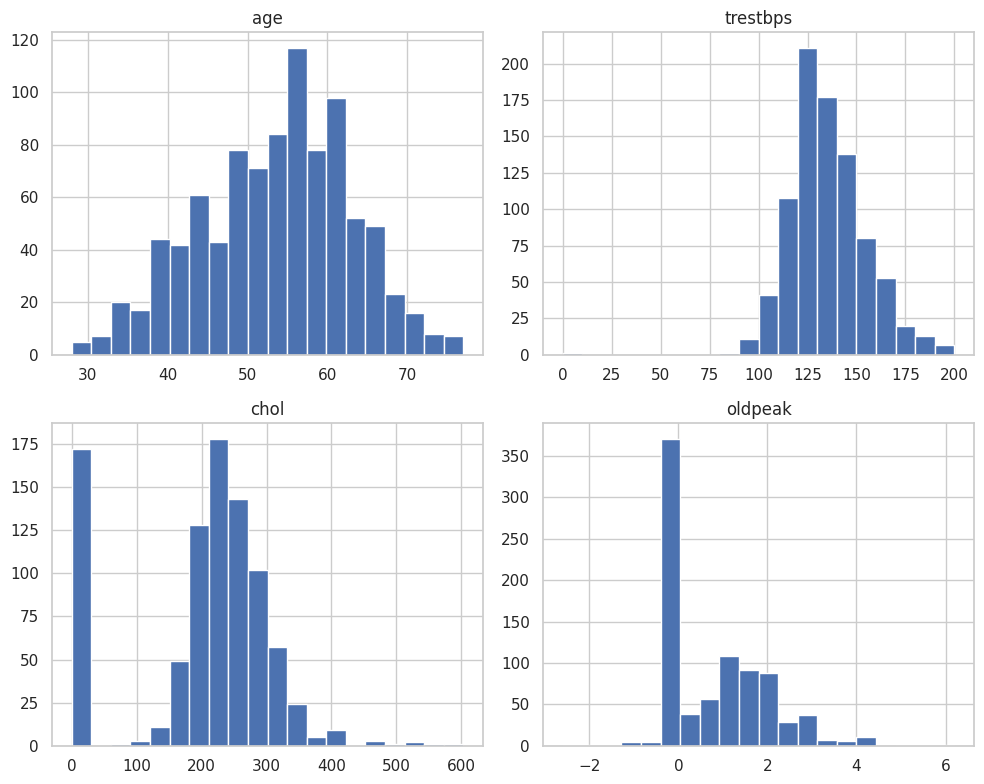

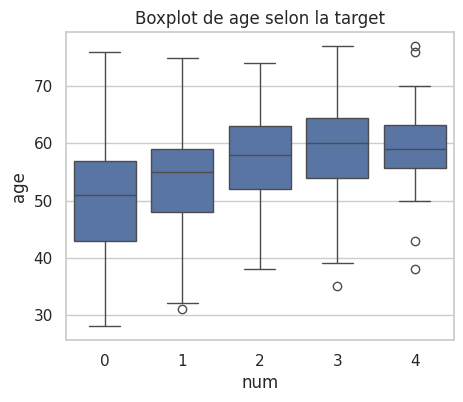

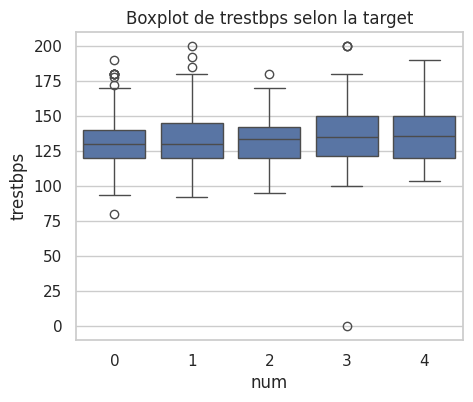

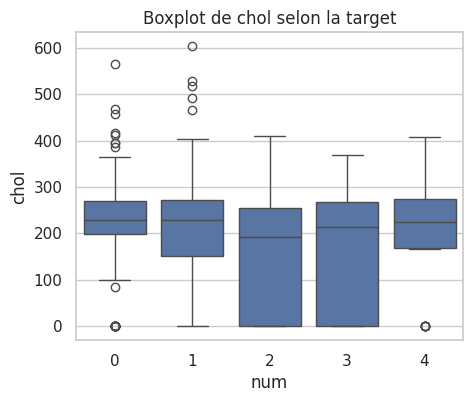

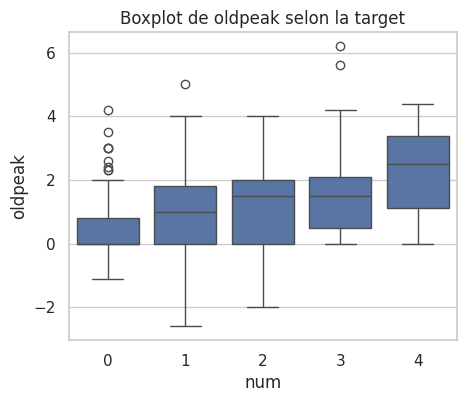

In [10]:
target_col = "num"

df[num_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f"Boxplot de {col} selon la target")
    plt.show()

Matrice de corrélation (heatmap)

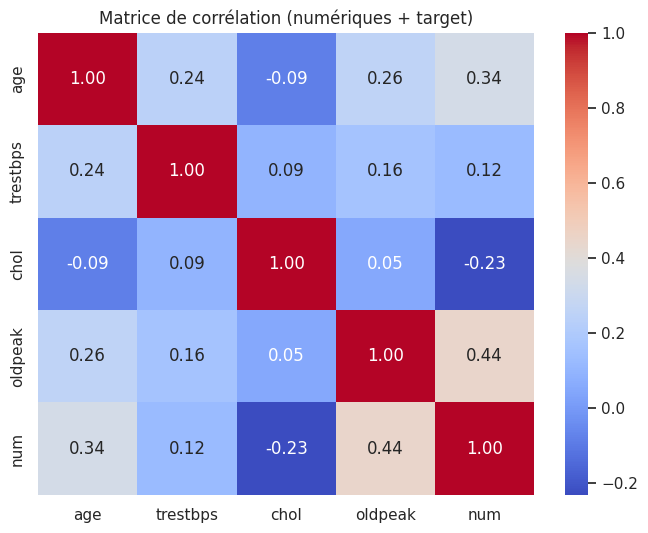

In [11]:
target_col = "num"
cols_corr = num_cols + [target_col]
corr = df[cols_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation (numériques + target)")
plt.show()

Countplots des variables catégorielles

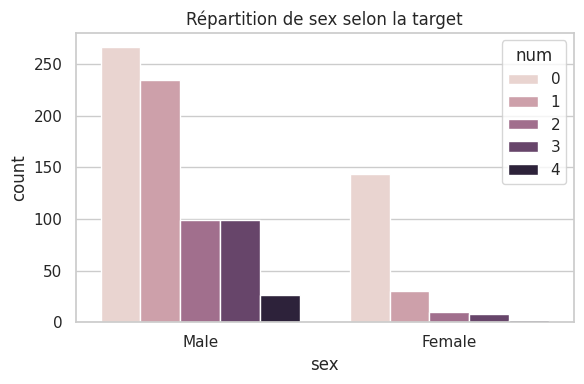

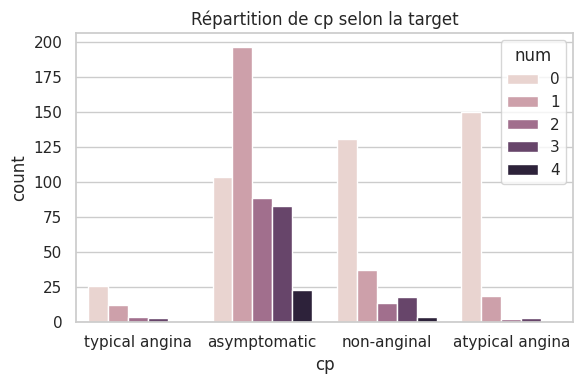

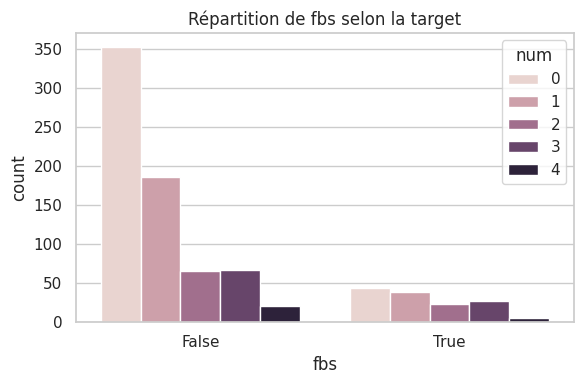

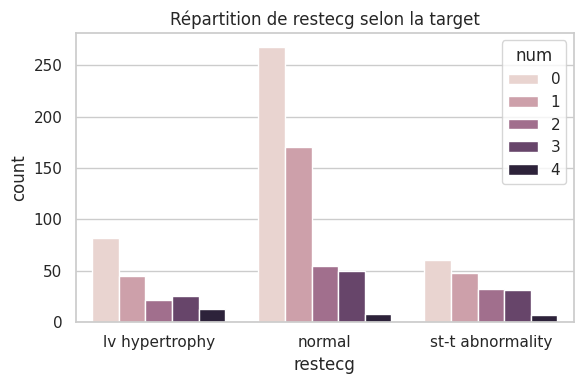

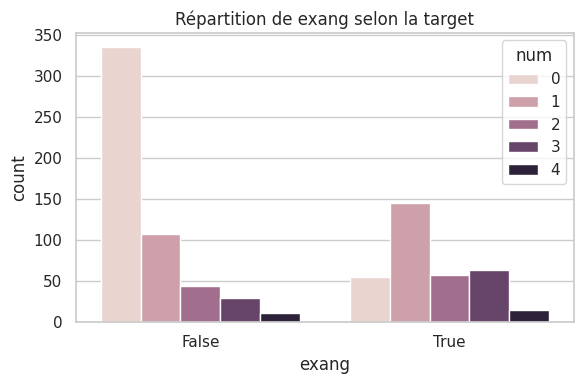

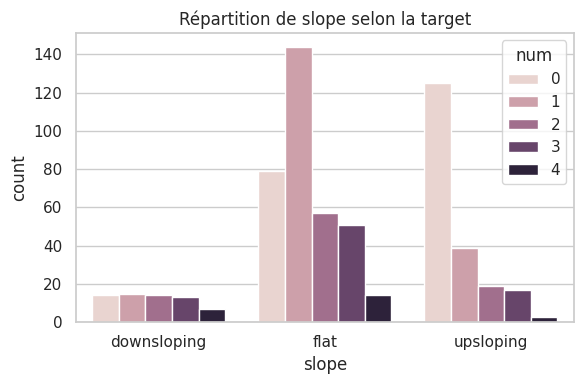

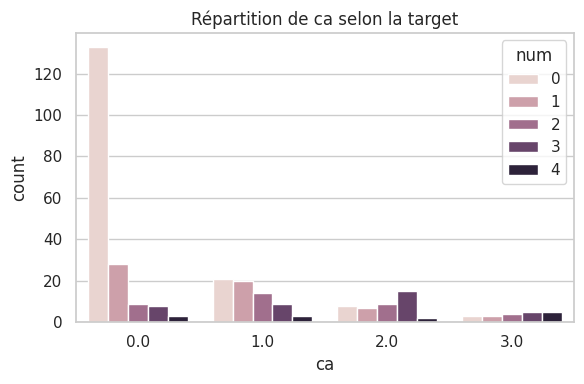

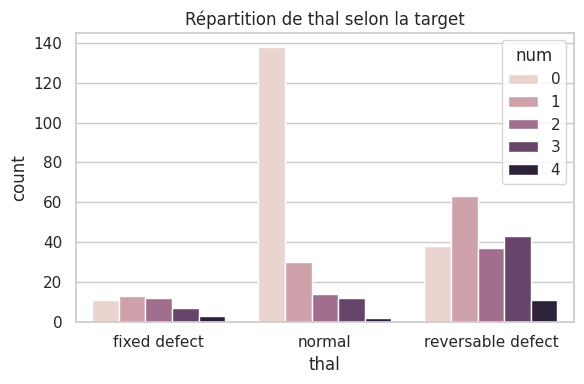

In [12]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f"Répartition de {col} selon la target")
    plt.legend(title=target_col, loc="upper right")
    plt.tight_layout()
    plt.show()


 Feature engineering et visualisation par tranche d’âge

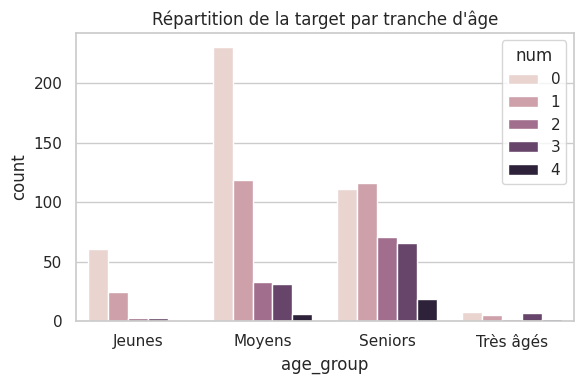

In [13]:
if "age" in df.columns:
    df["age_group"] = pd.cut(
        df["age"],
        bins=[20, 40, 55, 70, 100],
        labels=["Jeunes", "Moyens", "Seniors", "Très âgés"]
    )

if "chol" in df.columns and "age" in df.columns:
    df["chol_age_ratio"] = df["chol"] / df["age"]

if "oldpeak" in df.columns:
    seuil_oldpeak = 2.0
    df["oldpeak_high"] = (df["oldpeak"] > seuil_oldpeak).astype(int)

if "age_group" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x="age_group", hue=target_col, data=df)
    plt.title("Répartition de la target par tranche d'âge")
    plt.tight_layout()
    plt.show()
